<h1 text align = "center"> Bellman Ford Algorithm VS Dijkstra's Algorithm </h1>

Bellman-Ford and Dijkstra's algorithms are fundamental tools in the realm of graph theory and algorithm design. Both serve the purpose of finding the shortest path in a weighted graph, yet they operate in distinct ways and are suited for different scenarios. Bellman-Ford, capable of handling graphs with negative edge weights, ensures accuracy but can be less efficient. 

Conversely, Dijkstra's algorithm excels in efficiency on non-negative weighted graphs but falters when dealing with negative weights. Understanding their nuances is crucial in selecting the right algorithm based on the specific characteristics of the graph at hand.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Based on the commands , we observed and collected certain data based on CLI in command prompt . We have taken Router 2 as the primary router. We will be going through other routers and switches.

In [3]:
sns.set_palette('rainbow')
sns.set_style('darkgrid')

In [2]:
df_rip3r = pd.read_excel(r'rip3r.xlsx')
df_ospf3r = pd.read_excel(r'opsf3r.xlsx')
df_rip4r = pd.read_excel(r'rip4r.xlsx')
df_ospf4r = pd.read_excel(r'opsf4r.xlsx')
df_rip3r4s = pd.read_excel(r'rip3r4s.xlsx')
df_ospf3r4s = pd.read_excel(r'opsf3r4s.xlsx')

### Packet Delivery Ratio

*The packet delivery ratio is the ratio of packets successfully received to the total sent. Throughput is the rate at which information is sent through the network. If a network becomes congested and there is good discipline, packets may queue up at the source and never enter the network. Those packets will not contribute to throughput, but because they are never sent, won't affect the PDR at all.*

*The danger is having a traffic management that strives to keep the PDR high by limiting traffic so much that throughput suffers. From a user's standpoint, throughput is the important thing. However, from a network design standpoint, PDR is important to identifying issues that might lead to poor throughput.*

<img src = "cn1.png">

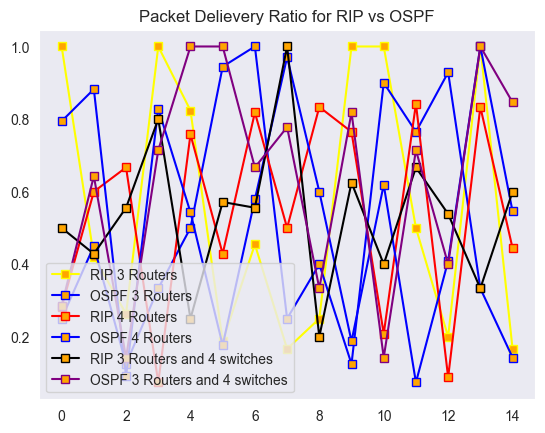

In [14]:
plt.plot(df_rip3r['Packet Delivery Ratio'],marker = 's',markerfacecolor='orange',color="yellow",label='RIP 3 Routers')
plt.plot(df_ospf3r['Packet Delivery Ratio'],marker = 's',markerfacecolor='orange',color="blue",label='OSPF 3 Routers')

plt.plot(df_rip4r['Packet Delivery Ratio'],marker = 's',markerfacecolor='orange',color="red",label='RIP 4 Routers')
plt.plot(df_ospf4r['Packet Delivery Ratio'],marker = 's',markerfacecolor='orange',color="blue",label='OSPF 4 Routers')

plt.plot(df_rip3r4s['Packet Delivery Ratio'],marker = 's',markerfacecolor='orange',color="black",label='RIP 3 Routers and 4 switches')
plt.plot(df_ospf3r4s['Packet Delivery Ratio'],marker = 's',markerfacecolor='orange',color="purple",label='OSPF 3 Routers and 4 switches')

plt.legend()
plt.grid()
plt.title('Packet Delievery Ratio for RIP vs OSPF')
plt.show()

### End to End Delay (Latency)

*The end-to-end delay is measured from the moment the packet leaves the source application to the moment the same packet arrives at the destination application.*

*The end-to-end delay is measured by the meanBitLifeTimePerPacket statistic. The statistic measures the lifetime of the packet, i.e. time from creation in the source application to deletion in the destination application.*

<img src = "cn2.png">

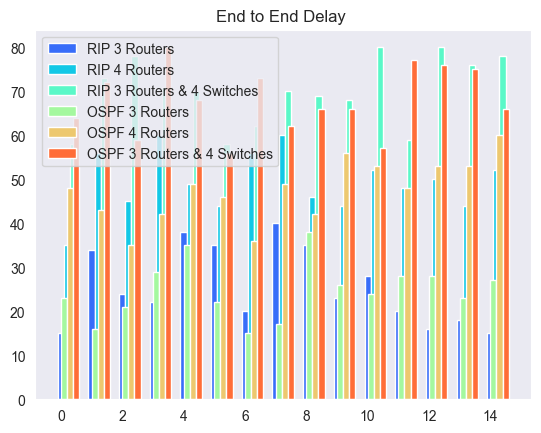

In [38]:
data1 = df_rip3r['Latency (End-to-End Delay)']
data4 = df_ospf3r['Latency (End-to-End Delay)']
data2 = df_rip4r['Latency (End-to-End Delay)']
data5 = df_ospf4r['Latency (End-to-End Delay)']
data3 = df_rip3r4s['Latency (End-to-End Delay)']
data6 = df_ospf3r4s['Latency (End-to-End Delay)']


x_values = range(len(data1))

# Plotting the bars for each dataset
plt.bar(x_values, data1, width=0.2, align='center', label = 'RIP 3 Routers')
plt.bar([x + 0.2 for x in x_values], data2, width=0.2, align='center',label='RIP 4 Routers')
plt.bar([x + 0.4 for x in x_values], data3, width=0.2, align='center',label='RIP 3 Routers & 4 Switches')



plt.bar([x + 0.1 for x in x_values], data4, width=0.2, align='center',label='OSPF 3 Routers')
plt.bar([x + 0.3 for x in x_values], data5, width=0.2, align='center',label='OSPF 4 Routers')
plt.bar([x + 0.5 for x in x_values], data6, width=0.2, align='center',label = 'OSPF 3 Routers & 4 Switches')

plt.title('End to End Delay ')

plt.legend()
plt.grid()
plt.show()

### Normalized Routing load

*The normalized routing load is defined as the fraction of all routing control packets sent by all nodes over the number of received data packets at the destination nodes. In other words, it is the ratio between the total numbers of routing packets sent over the network to the total number of data packets received.*

<img src = "cn4.png">

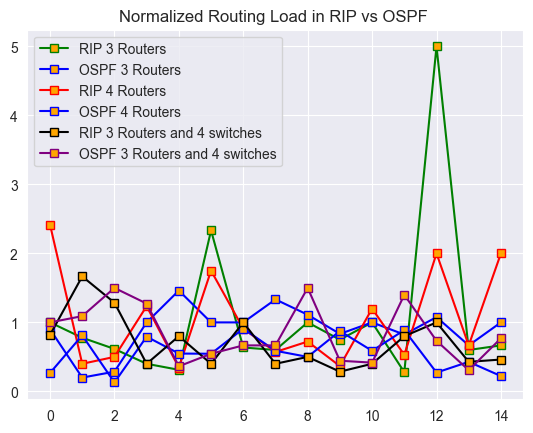

In [18]:
plt.plot(df_rip3r['Normalized Routing Load'],marker = 's',markerfacecolor='orange',color="green",label='RIP 3 Routers')
plt.plot(df_ospf3r['Normalized Routing Load'],marker = 's',markerfacecolor='orange',color="blue",label='OSPF 3 Routers')
plt.plot(df_rip4r['Normalized Routing Load'],marker = 's',markerfacecolor='orange',color="red",label='RIP 4 Routers')
plt.plot(df_ospf4r['Normalized Routing Load'],marker = 's',markerfacecolor='orange',color="blue",label='OSPF 4 Routers')
plt.plot(df_rip3r4s['Normalized Routing Load'],marker = 's',markerfacecolor='orange',color="black",label='RIP 3 Routers and 4 switches')
plt.plot(df_ospf3r4s['Normalized Routing Load'],marker = 's',markerfacecolor='orange',color="purple",label='OSPF 3 Routers and 4 switches')

plt.title('Normalized Routing Load in RIP vs OSPF ')
plt.legend()

### Route Discovery Frequency

*Router discovery allows a host to discover the addresses of operational routers on the subnet. Router discovery uses Internet Control Message Protocol (ICMP) router advertisements and router solicitation messages to allow a host to discover the addresses of operational routers on the subnet.*

<img src = "cn3.png">

In [50]:
sns.set_palette("Spectral")

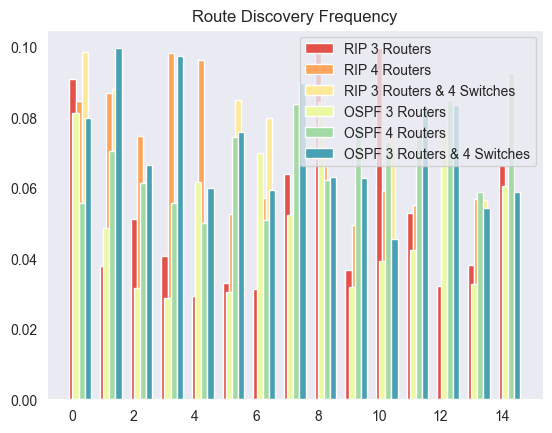

In [51]:
data1 = df_rip3r['Route Discovery Frequency']
data4 = df_ospf3r['Route Discovery Frequency']
data2 = df_rip4r['Route Discovery Frequency']
data5 = df_ospf4r['Route Discovery Frequency']
data3 = df_rip3r4s['Route Discovery Frequency']
data6 = df_ospf3r4s['Route Discovery Frequency']


x_values = range(len(data1))

# Plotting the bars for each dataset
plt.bar(x_values, data1, width=0.2, align='center', label = 'RIP 3 Routers')
plt.bar([x + 0.2 for x in x_values], data2, width=0.2, align='center',label='RIP 4 Routers')
plt.bar([x + 0.4 for x in x_values], data3, width=0.2, align='center',label='RIP 3 Routers & 4 Switches')



plt.bar([x + 0.1 for x in x_values], data4, width=0.2, align='center',label='OSPF 3 Routers')
plt.bar([x + 0.3 for x in x_values], data5, width=0.2, align='center',label='OSPF 4 Routers')
plt.bar([x + 0.5 for x in x_values], data6, width=0.2, align='center',label = 'OSPF 3 Routers & 4 Switches')

plt.title('Route Discovery Frequency')

plt.legend()
plt.grid()
plt.show()

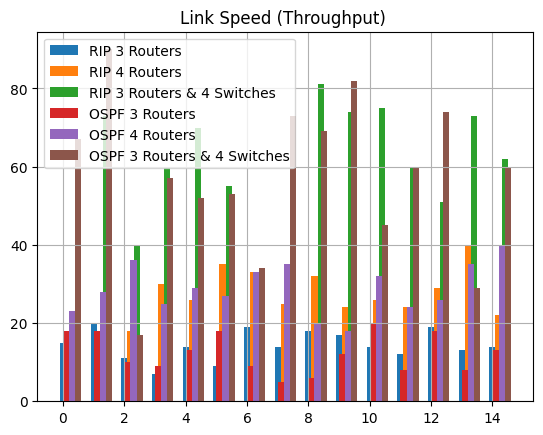

In [4]:
data1 = df_rip3r['Link Speed (Throughput)']
data4 = df_ospf3r['Link Speed (Throughput)']
data2 = df_rip4r['Link Speed (Throughput)']
data5 = df_ospf4r['Link Speed (Throughput)']
data3 = df_rip3r4s['Link Speed (Throughput)']
data6 = df_ospf3r4s['Link Speed (Throughput)']


x_values = range(len(data1))

# Plotting the bars for each dataset
plt.bar(x_values, data1, width=0.2, align='center', label = 'RIP 3 Routers')
plt.bar([x + 0.2 for x in x_values], data2, width=0.2, align='center',label='RIP 4 Routers')
plt.bar([x + 0.4 for x in x_values], data3, width=0.2, align='center',label='RIP 3 Routers & 4 Switches')



plt.bar([x + 0.1 for x in x_values], data4, width=0.2, align='center',label='OSPF 3 Routers')
plt.bar([x + 0.3 for x in x_values], data5, width=0.2, align='center',label='OSPF 4 Routers')
plt.bar([x + 0.5 for x in x_values], data6, width=0.2, align='center',label = 'OSPF 3 Routers & 4 Switches')

plt.title('Link Speed (Throughput) ')

plt.legend()
plt.grid()
plt.show()